Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7585 - loss: 0.6552 - val_accuracy: 0.8739 - val_loss: 0.3522
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8833 - loss: 0.3185 - val_accuracy: 0.8886 - val_loss: 0.3033
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9032 - loss: 0.2646 - val_accuracy: 0.8917 - val_loss: 0.3006
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


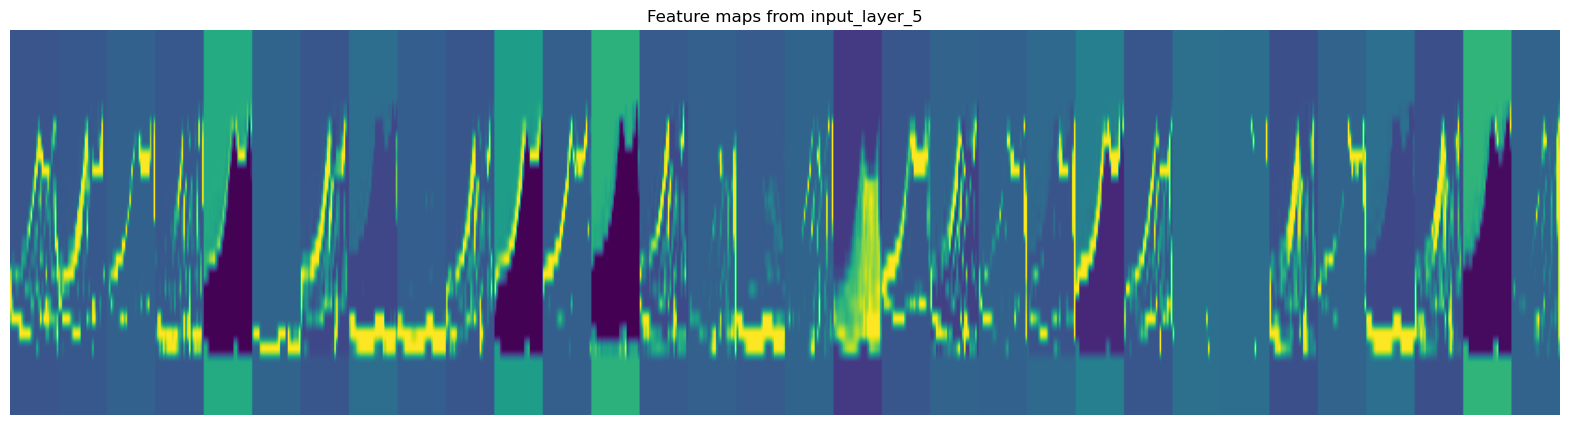

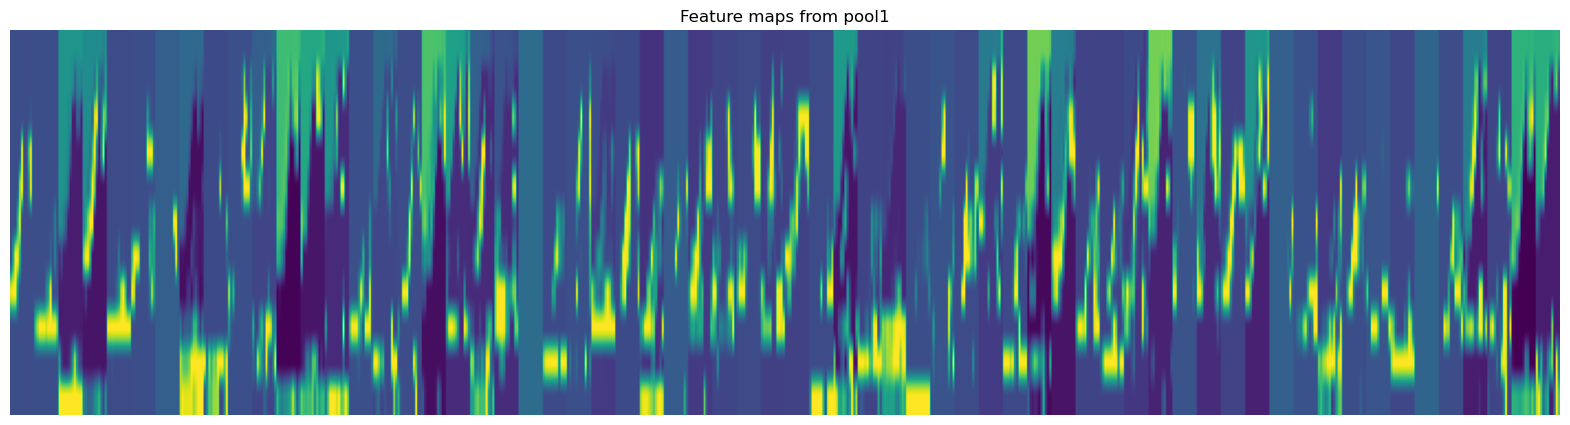

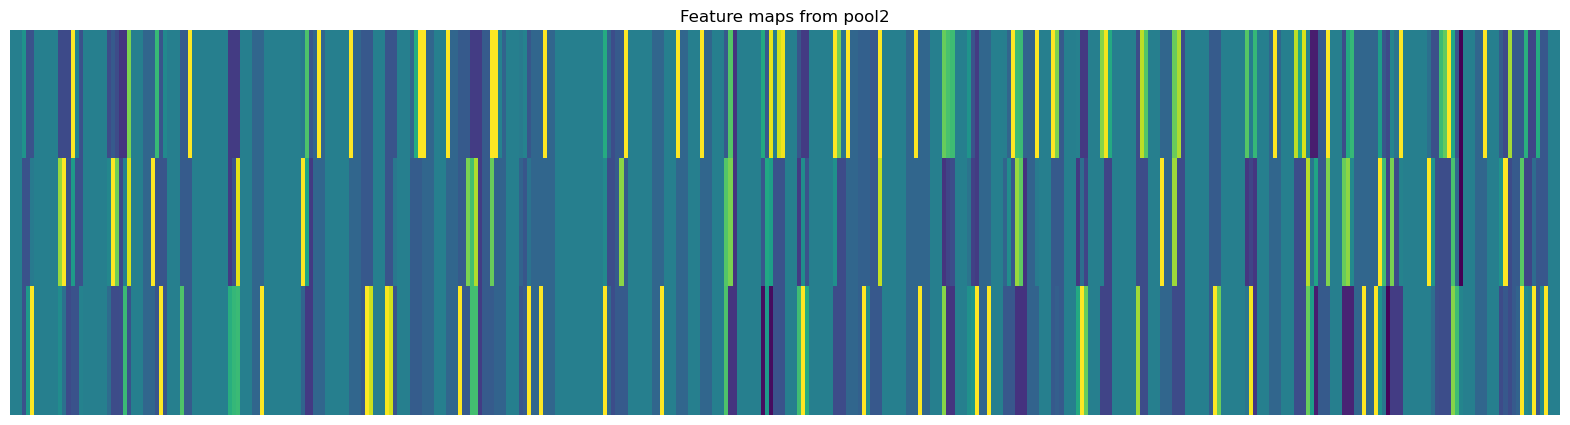

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Load and preprocess Fashion-MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Define class names for reference (not used directly here)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Build the CNN model using Functional API
input_layer = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv1")(input_layer)
x = layers.MaxPooling2D((2, 2), name="pool1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(x)
x = layers.MaxPooling2D((2, 2), name="pool2")(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="conv3")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Create a new model to output intermediate layer activations
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Pick a test image to visualize
img = x_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

# Plot feature maps from each convolutional layer
for i, activation in enumerate(activations):
    layer_name = model.get_layer(index=i*2).name  # conv1, conv2, conv3
    num_filters = activation.shape[-1]
    size = activation.shape[1]

    # Create display grid for feature maps
    display_grid = np.zeros((size, size * num_filters))
    for j in range(num_filters):
        feature_map = activation[0, :, :, j]
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        display_grid[:, j * size : (j + 1) * size] = feature_map

    # Show the feature map grid
    plt.figure(figsize=(20, 5))
    plt.title(f"Feature maps from {layer_name}")
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.show()


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

input_layer = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv1")(input_layer)
x = layers.MaxPooling2D((2, 2), name="pool1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(x)
x = layers.MaxPooling2D((2, 2), name="pool2")(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="conv3")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Extract intermediate layer outputs
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

img = x_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

# Save visualizations
for i, activation in enumerate(activations):
    layer_name = model.get_layer(index=i*2).name
    num_filters = activation.shape[-1]
    size = activation.shape[1]
    display_grid = np.zeros((size, size * num_filters))
    for j in range(num_filters):
        feature_map = activation[0, :, :, j]
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        display_grid[:, j * size : (j + 1) * size] = feature_map

    plt.figure(figsize=(20, 5))
    plt.title(f"Feature maps from {layer_name}")
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.savefig(f"feature_maps_{layer_name}.png", bbox_inches='tight')
    plt.close()


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 12ms/step - accuracy: 0.7558 - loss: 0.6570 - val_accuracy: 0.8774 - val_loss: 0.3460
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8881 - loss: 0.3109 - val_accuracy: 0.8899 - val_loss: 0.3061
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9034 - loss: 0.2609 - val_accuracy: 0.9024 - val_loss: 0.2718
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 12ms/step - accuracy: 0.7508 - loss: 0.6734 - val_accuracy: 0.8714 - val_loss: 0.3727
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.8812 - loss: 0.3250 - val_accuracy: 0.8808 - val_loss: 0.3154
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9014 - loss: 0.2706 - val_accuracy: 0.8920 - val_loss: 0.2961
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


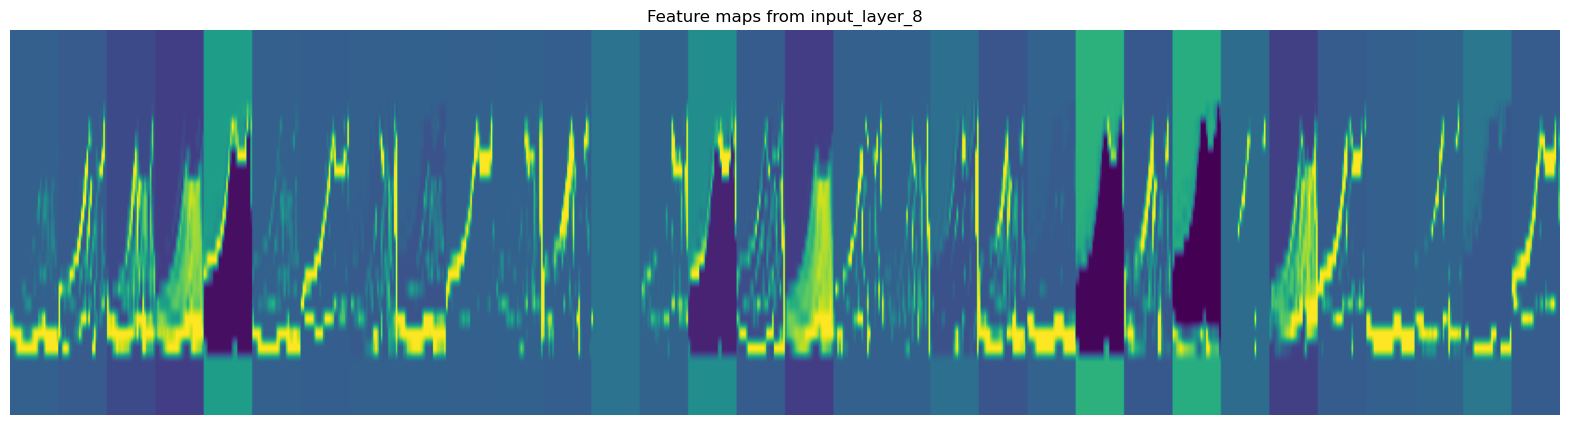

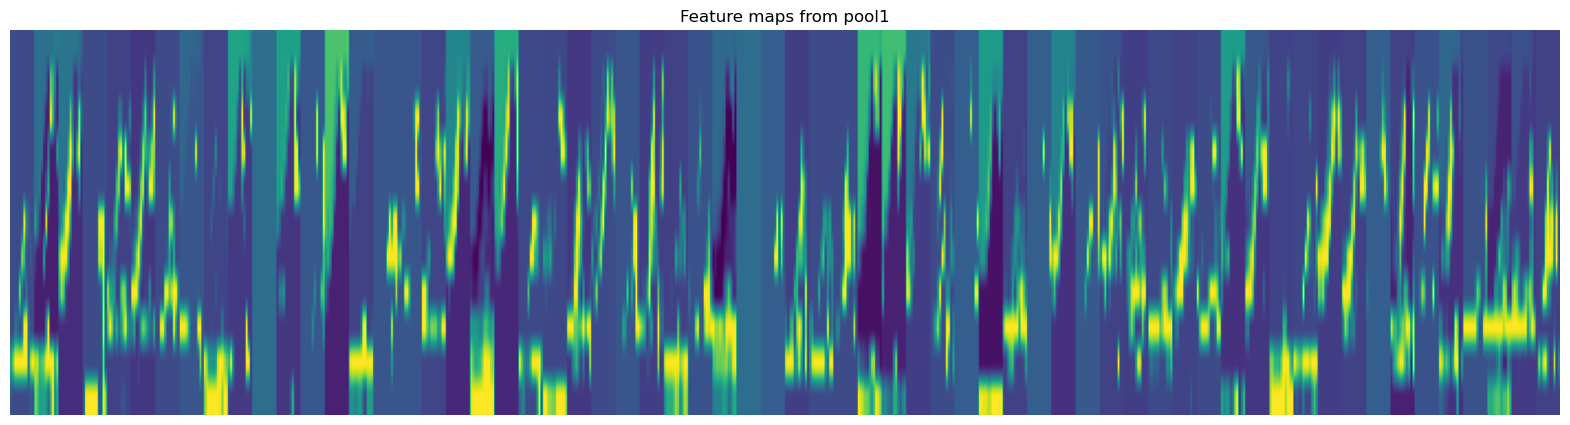

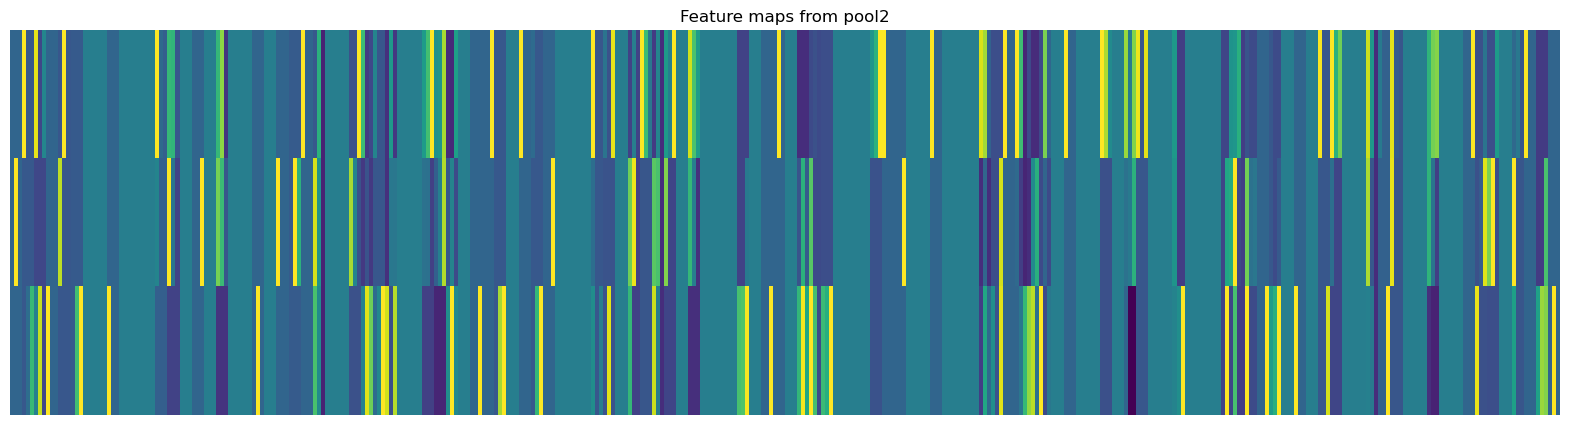

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models, Input

# Load and preprocess Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Build the CNN model using Functional API
input_layer = Input(shape=(28, 28, 1))
x = layers.Conv2D(32, (3, 3), activation='relu', name="conv1")(input_layer)
x = layers.MaxPooling2D((2, 2), name="pool1")(x)
x = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(x)
x = layers.MaxPooling2D((2, 2), name="pool2")(x)
x = layers.Conv2D(128, (3, 3), activation='relu', name="conv3")(x)
x = layers.Flatten()(x)
x = layers.Dense(64, activation='relu')(x)
output_layer = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))

# Create a new model to output intermediate layer activations
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Pick a test image to visualize
img = x_test[0].reshape(1, 28, 28, 1)
activations = activation_model.predict(img)

# Plot and save feature maps from each convolutional layer
for i, activation in enumerate(activations):
    layer_name = model.get_layer(index=i*2).name  # conv1, conv2, conv3
    num_filters = activation.shape[-1]
    size = activation.shape[1]

    # Create display grid for feature maps
    display_grid = np.zeros((size, size * num_filters))
    for j in range(num_filters):
        feature_map = activation[0, :, :, j]
        feature_map -= feature_map.mean()
        feature_map /= (feature_map.std() + 1e-5)
        feature_map *= 64
        feature_map += 128
        feature_map = np.clip(feature_map, 0, 255).astype('uint8')
        display_grid[:, j * size : (j + 1) * size] = feature_map

    # Save the feature map grid as an image
    plt.figure(figsize=(20, 5))
    plt.title(f"Feature maps from {layer_name}")
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.axis('off')
    plt.savefig(f"feature_maps_{layer_name}.png", bbox_inches='tight')
    plt.show()